# ElasticNet

In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felipe/Documents/Brain/Brain_Model/'
import sys
sys.path.append(path_) 

In [2]:
path=  'C:/Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model/'
import sys
sys.path.append(path_) 

In [3]:
from sklearn.linear_model import ElasticNet
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class ElasticNetRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="ElasticNet"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = ElasticNet
        if params is None:
            self.params = {
                'alpha': 0.2,
                'l1_ratio': 0.5,  # Proporción de L1 en la regularización
                'max_iter': 10000,
                # 'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 10.0, prior='log-uniform'),
                'l1_ratio': Real(0.0, 1.0),  # Rango de 0 a 1 para la proporción de L1
                'max_iter': Integer(100, 10000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model = ElasticNetRegressor()
Plotters = Plotter()

In [5]:
# Parametros de Plot
colorset = 'Olive'
nameset = 'ElasticNet'

In [6]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}Brain_Age/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [8]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

c:\python_env\brain_age_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+05, tolerance: 5.585e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [9]:
with open(f'results_model/opt_model.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [ ]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

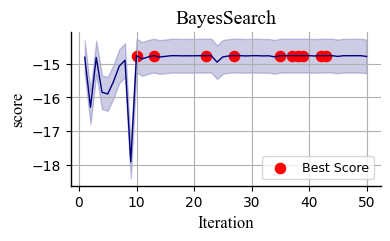

Top 1: Iteration 43, Score -14.762769108222855
Top 2: Iteration 13, Score -14.762900003412597
Top 3: Iteration 27, Score -14.763084462668814
Top 4: Iteration 37, Score -14.763687084759729
Top 5: Iteration 38, Score -14.763829052707504
Top 6: Iteration 22, Score -14.764171522228802
Top 7: Iteration 35, Score -14.764189791715122
Top 8: Iteration 39, Score -14.764214717885363
Top 9: Iteration 10, Score -14.764289197426091
Top 10: Iteration 42, Score -14.764378985432348


In [10]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [47]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 0.0017339174406081816,
  'l1_ratio': 0.0,
  'max_iter': 5304,
  'tol': 1e-05},
 {'alpha': 0.0018690109192089188,
  'l1_ratio': 0.0,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.001, 'l1_ratio': 0.0, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.0012208331806573673,
  'l1_ratio': 0.4247165403447666,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.0027600501648809964,
  'l1_ratio': 0.0,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.001,
  'l1_ratio': 0.7470174618876175,
  'max_iter': 6789,
  'tol': 5.032972159881092e-05},
 {'alpha': 0.001,
  'l1_ratio': 0.7348411430414279,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.0012894614531973572,
  'l1_ratio': 0.7298093653117781,
  'max_iter': 10000,
  'tol': 0.01},
 {'alpha': 0.0010340016434251915,
  'l1_ratio': 0.8178300196637516,
  'max_iter': 7439,
  'tol': 5.803136333449209e-05},
 {'alpha': 0.003862366465943731,
  'l1_ratio': 0.28573580674008126,
  'max_iter': 1168,
  'tol': 0.00021413084130965745}]

# Training 1-Iteration 10Kfold 80%train 20%test


In [48]:
from sklearn.model_selection import train_test_split
# Dividir el dataframe
df_train, df_test = train_test_split(df_concatenado_CN, test_size=0.2, random_state=42)

# Resultado: df_train y df_test son dataframes


In [49]:
results_labels_df_CN_train, results_labels_df_CN_val, results_labels_patient, results_model, results_per_fold_CN_train, results_per_fold_CN_val, results_per_fold_patient= model.trainer(df_CN=df_train, n_splits=10, n_iterations=1, params_=best_params_[0], scaler=2)

c:\python_env\brain_age_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.332e+05, tolerance: 3.994e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:233: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_train = pd.concat([resu

# Test

In [50]:
import pandas as pd
from scipy.stats import linregress


def process_test_data(df_train, df_test, results_model,results_per_fold_train, n_folds=10 ,feature_col_range= slice(None, -2),scaler=2):
   
    X_test = df_test.iloc[:, :-2]  # Features
    y_test = df_test.iloc[:, -2]   # Labels (Age)
    ID_test = df_test.iloc[:, -1]  # Unique IDs

    # DataFrame para almacenar los resultados generales
    results_labels_df_CN_test = pd.DataFrame(columns=['y_labels', 'y_pred', 'y_pred_corrected', 'GAP', 'GAP_corrected', 'ID-unique'])
    results_per_fold_CN_test = []

    for fold in range(n_folds):
        # Train
        ID_train_fold = results_per_fold_train[fold]['ID-unique']
        df_train_fold = df_train[df_train['ID-unique'].isin(ID_train_fold)]
        X_train_kf = df_train_fold.iloc[:, feature_col_range]  # Features
        y_train_kf = df_train_fold.iloc[:, -2]  # Labels

        #slope = results_model['slope'][fold]
        #intercept = results_model['intercept'][fold]
        #mean_X_train_kf = results_model['mean_X_train_kf'][fold]
        #std_X_train_kf = results_model['std_X_train_kf'][fold]
        
        if scaler == 1:
            # No escalar
            X_train_kf_scaled = X_train_kf
            X_test_CN_scaled = X_test
        elif scaler == 2:
            # Z-score scaling
            mean_X_train_kf = X_train_kf.mean()
            std_X_train_kf = X_train_kf.std()
            X_train_kf_scaled = (X_train_kf - mean_X_train_kf) / std_X_train_kf
            X_test_CN_scaled = (X_test - mean_X_train_kf) / std_X_train_kf
        elif scaler == 3:
            # MinMax scaling (manual)
            min_X_train_kf = X_train_kf.min()
            max_X_train_kf = X_train_kf.max()
            X_train_kf_scaled = (X_train_kf - min_X_train_kf) / (max_X_train_kf - min_X_train_kf)
            X_test_CN_scaled = (X_test - min_X_train_kf) / (max_X_train_kf - min_X_train_kf)


        # Escalado de los datos de prueba
        X_test_CN_scaled = (X_test - mean_X_train_kf) / std_X_train_kf

        # Obtener el modelo del fold actual
        model_ = results_model['model'][fold]

        y_pred_CN_train = model_.predict(X_train_kf_scaled)
        gap_CN_train = y_pred_CN_train - y_train_kf



        # Predicción
        y_pred_CN_test = model_.predict(X_test_CN_scaled)
        gap_CN_test = y_pred_CN_test - y_test

        slope, intercept, _, _, _ = linregress(y_train_kf, gap_CN_train)


        # Corrección de la predicción
        y_pred_corrected_CN_test = y_pred_CN_test - (slope * y_test + intercept)
        corrected_gap_CN_test = gap_CN_test - (slope * y_test + intercept)

        # Crear un DataFrame temporal con los resultados
        temp_CN_df_test = pd.DataFrame({
            'y_labels': y_test,
            'y_pred': y_pred_CN_test,
            'y_pred_corrected': y_pred_corrected_CN_test,
            'GAP': gap_CN_test,
            'GAP_corrected': corrected_gap_CN_test,
            'ID-unique': y_test
        })

        # Concatenar los resultados del fold al DataFrame general
        results_labels_df_CN_test = pd.concat([results_labels_df_CN_test, temp_CN_df_test], ignore_index=True)
        results_per_fold_CN_test.append(temp_CN_df_test.copy())

    return results_labels_df_CN_test, results_per_fold_CN_test


In [51]:
results_labels_df_CN_test, results_per_fold_CN_test = process_test_data(df_train,df_test, results_model,results_per_fold_CN_train)


C:\Users\felipe\AppData\Local\Temp\ipykernel_17780\873531791.py:78: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_test = pd.concat([results_labels_df_CN_test, temp_CN_df_test], ignore_index=True)


# Evaluación del modelo

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Lista de métricas
#metrics = ['mae', 'mse', 'rmse', 'r2']

# Diccionario para almacenar los resultados
#results = {'train': {m: [] for m in metrics}, 
#           #'val': {m: [] for m in metrics}, 
#           'test': {m: [] for m in metrics}}

metrics = ['mae', 'mse', 'rmse', 'r2']
results = {'train': {m: [] for m in metrics}, 
        'val': {m: [] for m in metrics}, 
        'test': {m: [] for m in metrics}}

# Función para calcular las métricas
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2}

# Recorrer los 10 folds
for fold_idx in range(10):
    fold_data_CN_train = results_per_fold_CN_train[fold_idx]
    fold_data_CN_val = results_per_fold_CN_val[fold_idx]
    fold_data_CN_test = results_per_fold_CN_test[fold_idx]

    # Obtener los valores de y_labels e y_pred_corrected
    y_true_1 = fold_data_CN_train['y_labels']
    y_pred_1 = fold_data_CN_train['y_pred']
    y_true_2 = fold_data_CN_val['y_labels']
    y_pred_2 = fold_data_CN_val['y_pred']
    y_true_3 = fold_data_CN_test['y_labels']
    y_pred_3 = fold_data_CN_test['y_pred']
    
    # Calcular métricas para el fold actual
    fold_metrics_1 = calculate_metrics(y_true_1, y_pred_1)
    fold_metrics_2 = calculate_metrics(y_true_2, y_pred_2)
    fold_metrics_3 = calculate_metrics(y_true_3, y_pred_3)

    # Guardar los resultados en el diccionario
    for metric in metrics:
        results['train'][metric].append(fold_metrics_1[metric])
        results['val'][metric].append(fold_metrics_2[metric]) 
        results['test'][metric].append(fold_metrics_3[metric]) 

# Imprimir resultados
#for metric in metrics:
#    print(f"{metric}: {results['train'][metric]}")

labels = ['train', 'val','test']

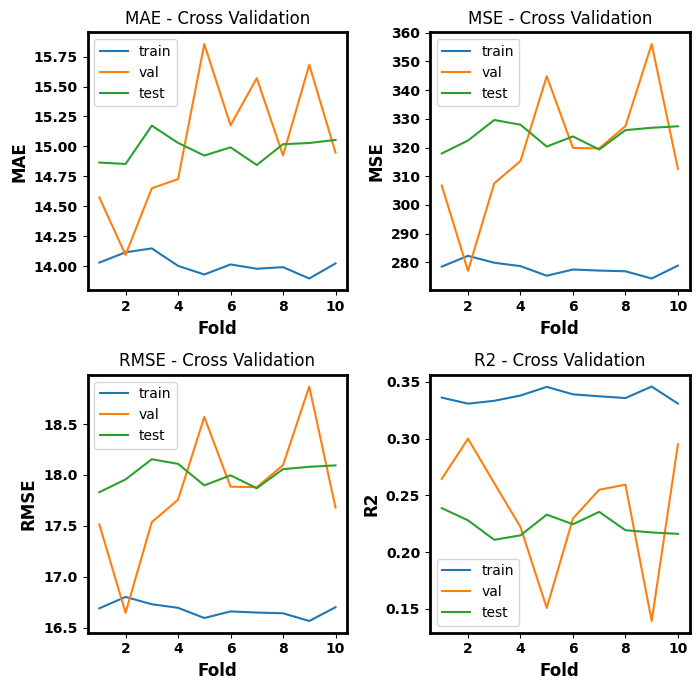

In [53]:
Plotters.plot_metricas_evaluacion(results, labels=labels, name_set='Cross Validation')

# Best Fold

In [54]:
mae_list = results['val']['mae']
min_mae_index = mae_list.index(min(mae_list))

y_labels_=results_per_fold_CN_test[min_mae_index]['y_labels']
y_pred_= results_per_fold_CN_test[min_mae_index]['y_pred_corrected']


                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     944.0
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           5.28e-89
Time:                        16:47:13   Log-Likelihood:                -994.53
No. Observations:                 265   AIC:                             1993.
Df Residuals:                     263   BIC:                             2000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7454      1.715      2.183      0.0

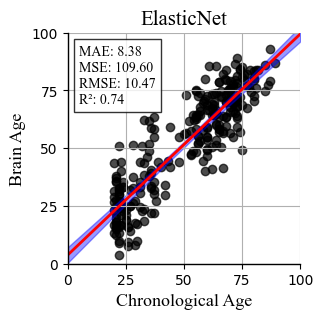

Error medio absoluto: 8.380328508533552
Error cuadrático medio: 109.60438180885217
Raíz del error cuadrático medio: 10.469211135938188
Coeficiente de determinación (R²): 0.737582822767149


In [55]:
Plotters.plot_regresion(y=y_pred_,x= y_labels_, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

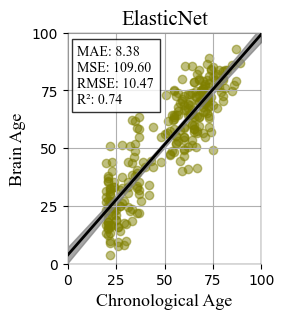

Error medio absoluto: 8.380328508533552
Error cuadrático medio: 109.60438180885217
Raíz del error cuadrático medio: 10.469211135938188
Coeficiente de determinación (R²): 0.737582822767149


In [56]:
Plotters.plot_regresion(y=y_pred_,x= y_labels_, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color=colorset, title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.5,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='gray',alpha_confidence_interval=0.7,color_line_fit=(0, 0, 0), details=False, font='Times New Roman', weight='normal', x_size=2.5,y_size=3, legend=False, fontsize=13, mode=3, legend_metrics=True)

# Simple SHAP

In [57]:
X_CN_test = df_test.iloc[:, :-2]  # Features
y_CN_test = df_test.iloc[:, -2]   # Labels (Age)
ID_CN_test = df_test.iloc[:, -1]

ID_fold = results_per_fold_CN_train[min_mae_index]['ID-unique']
df_train_fold = df_concatenado_CN[df_concatenado_CN['ID-unique'].isin(ID_fold)]

X_train_kf_CN = df_train_fold.iloc[:, :-2]  # Features
y_train_kf_CN = df_train_fold.iloc[:, -2]   # Labels (Age)
id_train_kf_CN = df_train_fold.iloc[:, -1]

mean_X_train_kf=results_model['mean_X_train_kf'][min_mae_index]
std_X_train_kf=results_model['std_X_train_kf'][min_mae_index]

best_model = results_model['model'][min_mae_index]

X_train_kf_CN_scaled= (X_train_kf_CN - mean_X_train_kf) / std_X_train_kf
X_test_CN_scaled = (X_CN_test - mean_X_train_kf) / std_X_train_kf



In [58]:
simple_shap_values, simple_shap_summary_sorted = model.calculate_simple_shap(X_train=X_train_kf_CN_scaled, X_test=X_test_CN_scaled, model=best_model)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD_OCC_left: 2915.334444317
Low_subj_spec_RPD_CING_left: 1682.0897635853798
High_subj_spec_RPD_OCC_left: 1439.5592547085007
High_subj_spec_EPP_OCC_left: 1354.8041897096527
Low_subj_spec_RPD_PARIET_left: 1202.696576002254
Low_subj_spec_EPP_CING_left: 1181.531750695774
Low_subj_spec_EPP_OCC_left: 1071.8312544812106
Alpha2_canon_RPD_OCC_left: 1054.4804668814058
Low_subj_spec_EPP_HPC_left: 1032.12743138932
Alpha2_canon_EPP_OCC_left: 1010.4460437309962
Low_subj_spec_EPP_PARIET_left: 861.883033417019
High_subj_spec_EPP_CING_left: 763.8287509556264
Low_subj_spec_RPD_HPC_left: 722.1041803381358
Low_subj_spec_EPP_HPC_right: 720.969389227289
High_subj_spec_RPD_CING_left: 708.0791739142791
Low_subj_spec_RPD_PARIET_right: 672.6838219025705
Alpha2_canon_EPP_OCC_right: 634.6805793899982
Alpha2_canon_RPD_OCC_right: 596.0639466762782
TF_MFG_right: 582.3751861129363
High_subj_spec_RPD_PARIET_right: 579.7240094547404
Low_subj_

In [59]:
with open('results_model/simple_shap_summary_sorted.pkl', 'wb') as f:
    pickle.dump(simple_shap_summary_sorted, f)

with open('results_model/simple_shap_values_avg_array.pkl', 'wb') as f:
    pickle.dump(simple_shap_values, f)

In [60]:
with open('results_model/simple_shap_summary_sorted.pkl', 'rb') as f:
    simple_shap_summary_sorted = pickle.load(f)

with open('results_model/simple_shap_values_avg_array.pkl', 'rb') as f:
    simple_shap_values_CN = pickle.load(f)


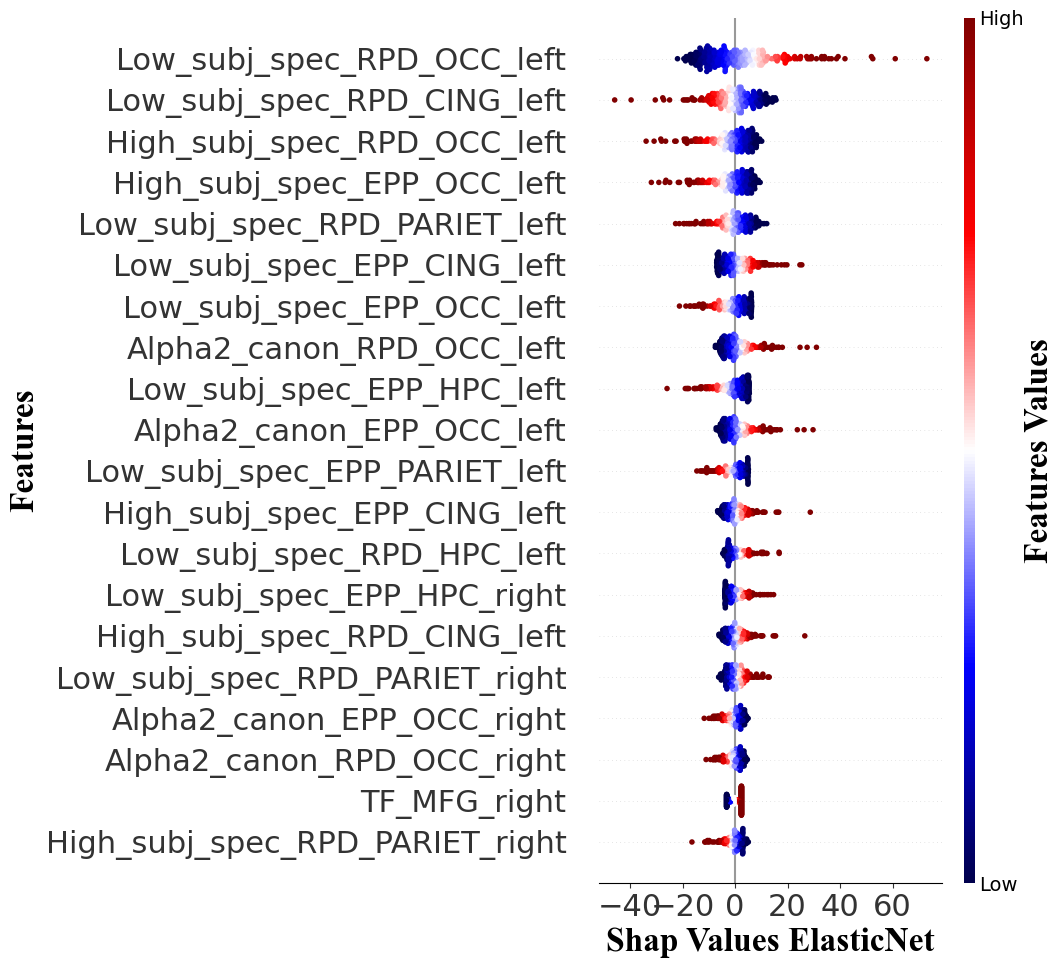

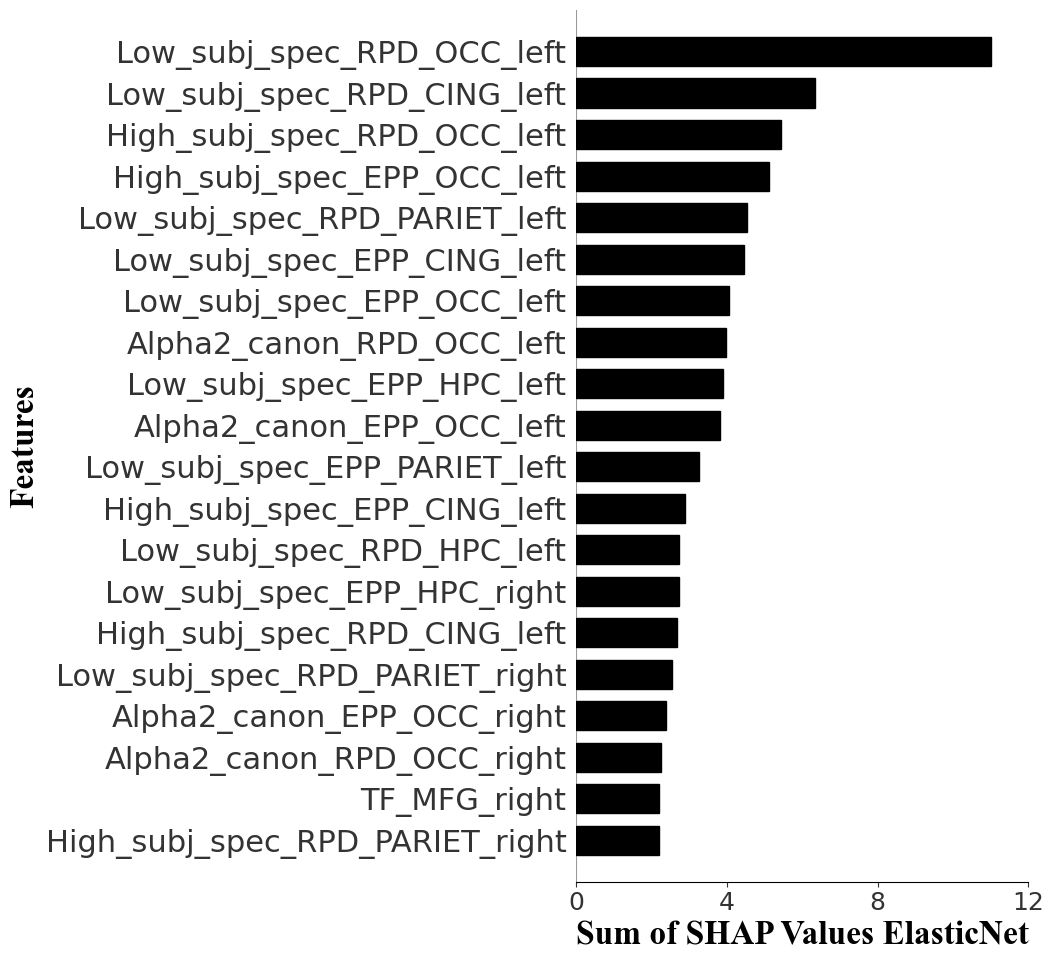

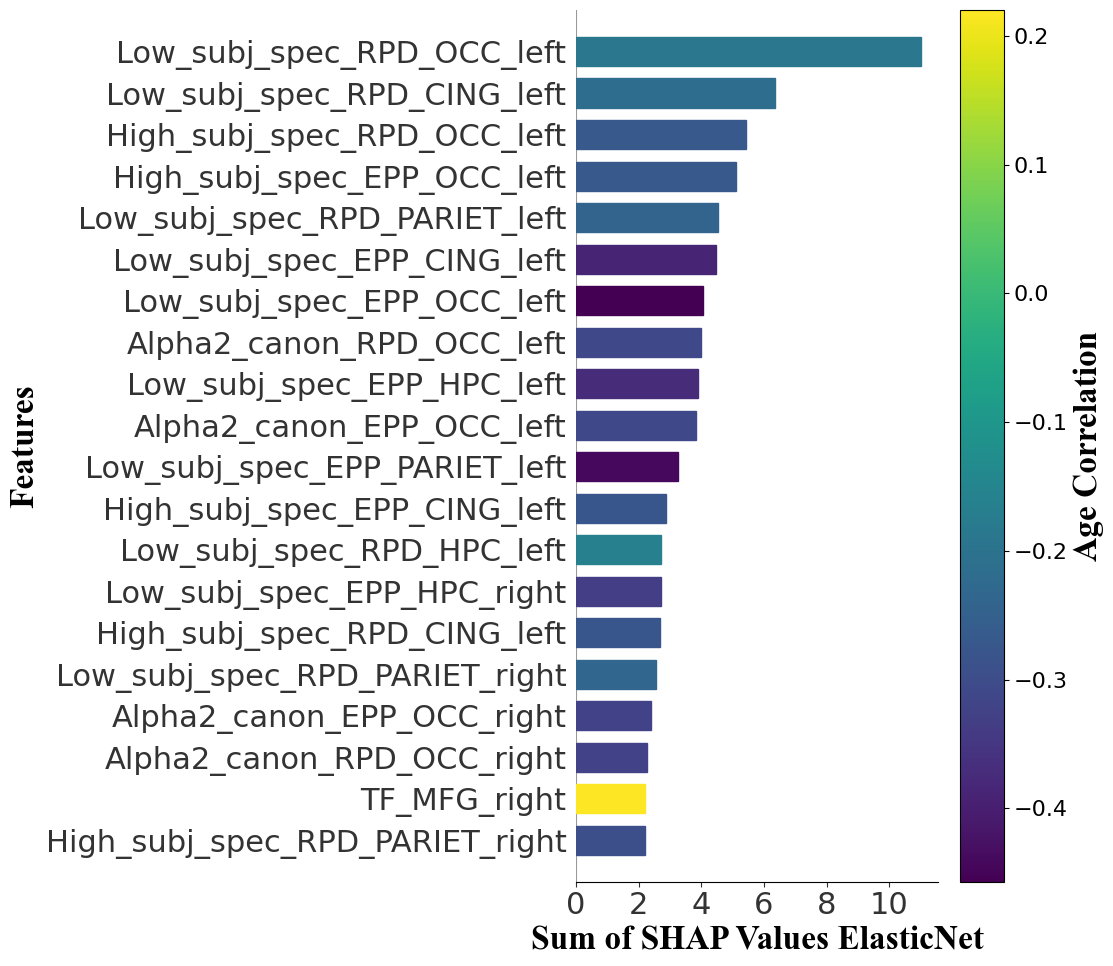

In [61]:
Plotters.plot_feature_importance(shap_values=shap_values,X_test=X_test_CN_scaled,y_test=y_CN_test, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

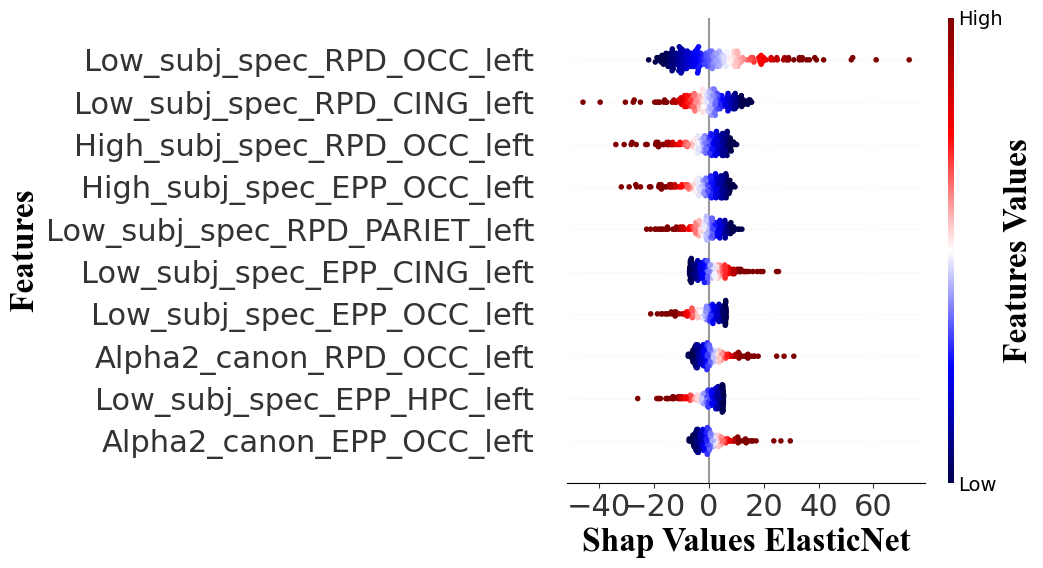

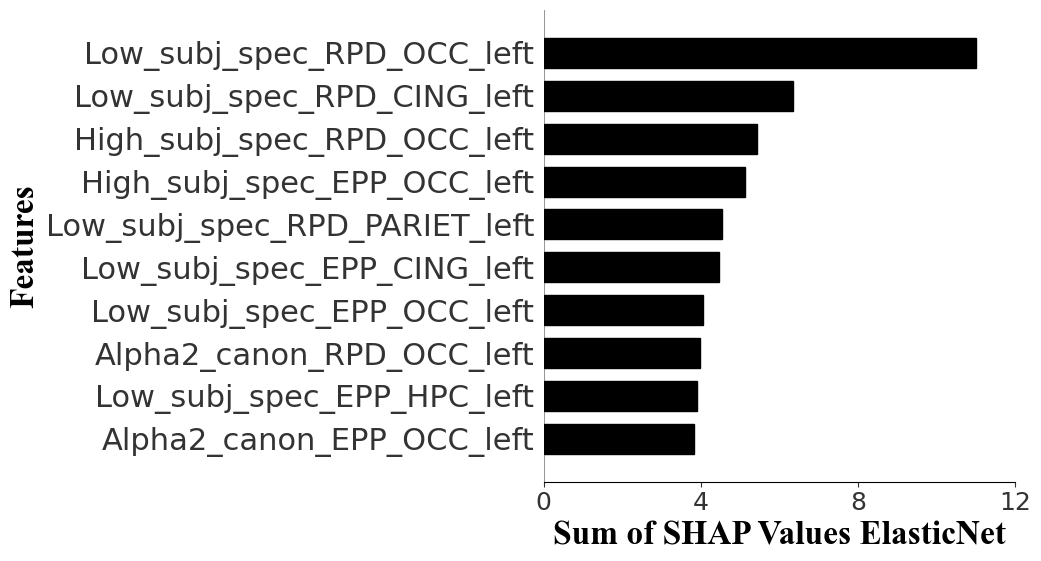

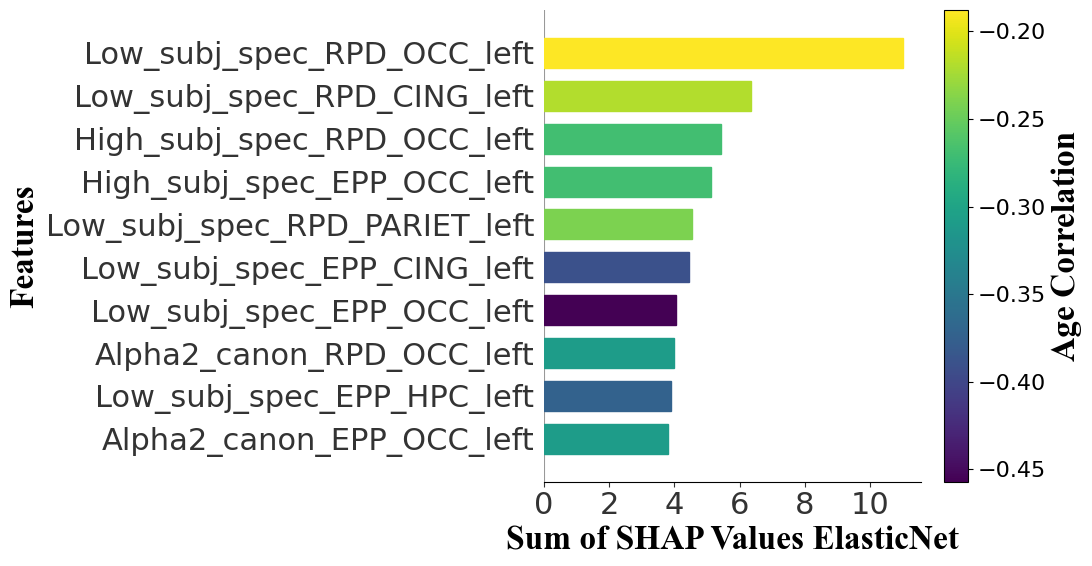

In [62]:
Plotters.plot_feature_importance(shap_values=simple_shap_values,X_test=X_test_CN_scaled,y_test=y_CN_test, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation',max_features=10)

In [63]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=simple_shap_summary_sorted, num_max=20)

OCC_left: 1.000000
CING_left: 0.490087
PARIET_left: 0.233379
HPC_left: 0.198298
PARIET_right: 0.141572
OCC_right: 0.139123
HPC_right: 0.081498
MFG_right: 0.065831


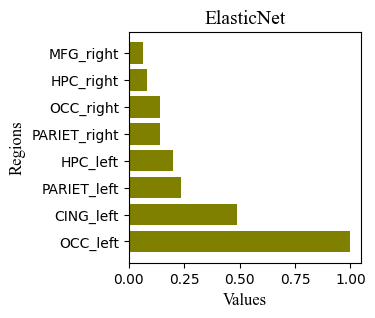

In [64]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


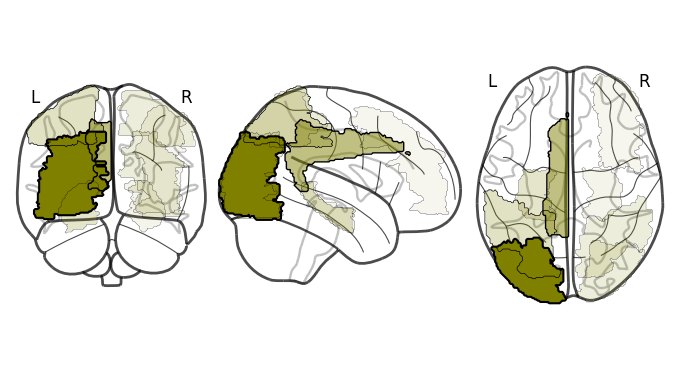

In [65]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)

# Taining 20-Iteration 10-Kfold 100%data

In [ ]:
results_labels_df_CN_train,results_labels_df_CN_test, results_labels_list, results_model, results_per_fold_CN_train,results_per_fold_CN_test, results_per_fold_pat= model.trainer(df_CN=df_concatenado_CN, n_splits=10, n_iterations=20, params_=best_params_[0])

In [67]:
import pickle

results_training = [results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, 
           results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat]

with open('results_model/resultados_modelo.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [ ]:
with open('results_model/resultados_modelo.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

# Acceder a los objetos
results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat = loaded_results

In [68]:
results_labels_df_total = [results_labels_df_CN_test]
results_avg_list = model.avg_list(results_labels_df_total)


In [69]:
results_avg_list_CN = results_avg_list[0]
df_CN_seleccion = df_CN_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_results = results_avg_list_CN.merge(df_CN_seleccion, on='ID-unique', how='left')


In [70]:
df_CN_results.to_excel('results/df_CN_results.xlsx', index=False)

                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     5070.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:52:56   Log-Likelihood:                -4947.9
No. Observations:                1323   AIC:                             9900.
Df Residuals:                    1321   BIC:                             9910.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3754      0.708      1.944      0.0

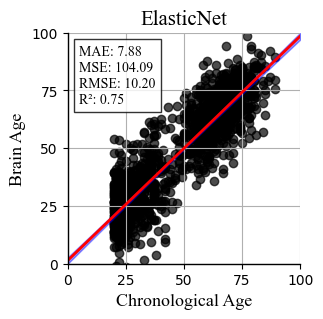

Error medio absoluto: 7.880242027518325
Error cuadrático medio: 104.09294773256387
Raíz del error cuadrático medio: 10.202595146949813
Coeficiente de determinación (R²): 0.7534402792084958


In [71]:
Plotters.plot_regresion(y=results_avg_list[0]['y_pred_corrected'],x= results_avg_list[0]['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

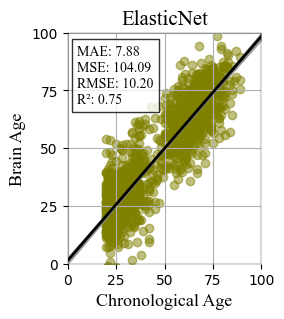

Error medio absoluto: 7.880242027518325
Error cuadrático medio: 104.09294773256387
Raíz del error cuadrático medio: 10.202595146949813
Coeficiente de determinación (R²): 0.7534402792084958


In [72]:
Plotters.plot_regresion(y=results_avg_list[0]['y_pred_corrected'],x= results_avg_list[0]['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color=colorset, title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.5,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='gray',alpha_confidence_interval=0.7,color_line_fit=(0, 0, 0), details=False, font='Times New Roman', weight='normal', x_size=2.5,y_size=3, legend=False, fontsize=13, mode=3, legend_metrics=True)

# Multiple SHAP

In [74]:
multiple_shap_values_CN, multiple_shap_summary_sorted_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN, results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'], slice(None, -2)
)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD_OCC_left: 12941.718628196195
High_subj_spec_RPD_OCC_left: 6183.957910233737
Low_subj_spec_RPD_PARIET_left: 5909.553078270784
High_subj_spec_EPP_OCC_left: 5834.849768829653
Low_subj_spec_EPP_CING_left: 5355.8725139075295
Low_subj_spec_RPD_CING_right: 5131.855456181707
Low_subj_spec_RPD_CING_left: 4780.244849752624
Low_subj_spec_EPP_HPC_left: 4693.419023477093
Low_subj_spec_RPD_PARIET_right: 4127.951922201508
Low_subj_spec_EPP_HPC_right: 3947.7989103831637
High_subj_spec_EPP_CING_left: 3737.237642755004
High_subj_spec_RPD_CING_left: 3548.187138591263
Low_subj_spec_EPP_PARIET_left: 3439.5721535541074
Alpha2_canon_RPD_OCC_left: 3130.849689705541
Alpha2_canon_EPP_OCC_left: 2980.065079046871
IAF_OCC_right: 2951.5122359623633
Alpha2_canon_EPP_HPC_left: 2818.0507989378357
TF_MFG_right: 2797.0649181696845
IAF_INS_right: 2771.7948451890056
Alpha2_canon_RPD_HPC_left: 2734.1380973583246
High_subj_spec_RPD_PARIET_right

In [75]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'wb') as f:
    pickle.dump(multiple_shap_summary_sorted_CN, f)

with open('results_model/multiple_shap_values_CN.pkl', 'wb') as f:
    pickle.dump(multiple_shap_values_CN, f)

In [ ]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    multiple_shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    multiple_shap_values_CN = pickle.load(f)


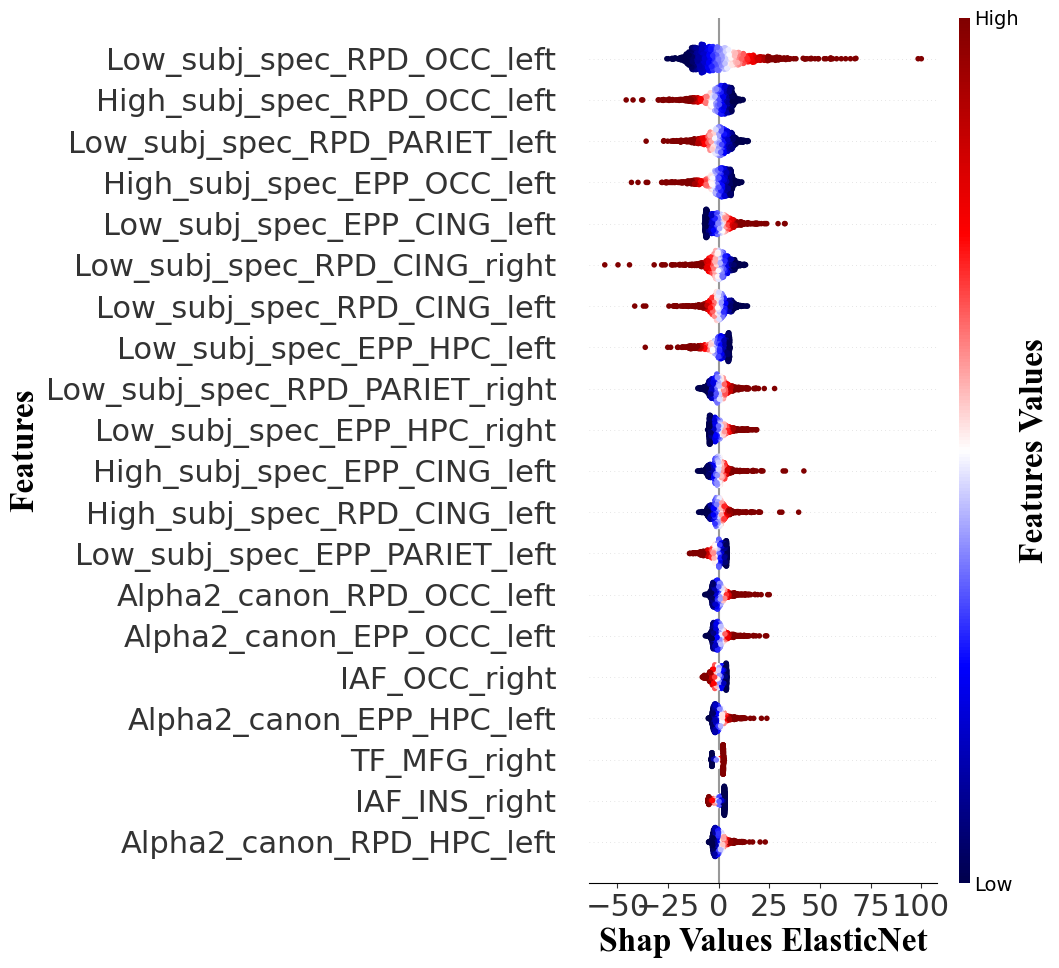

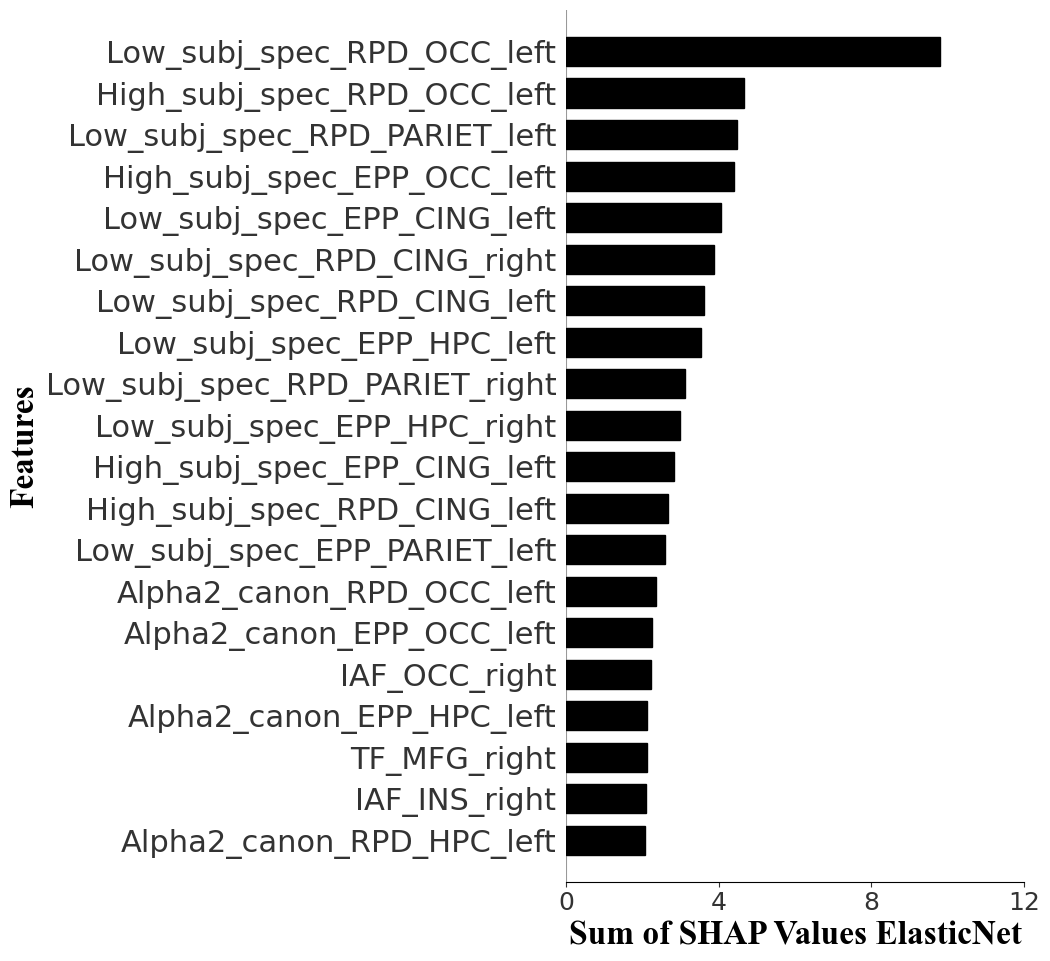

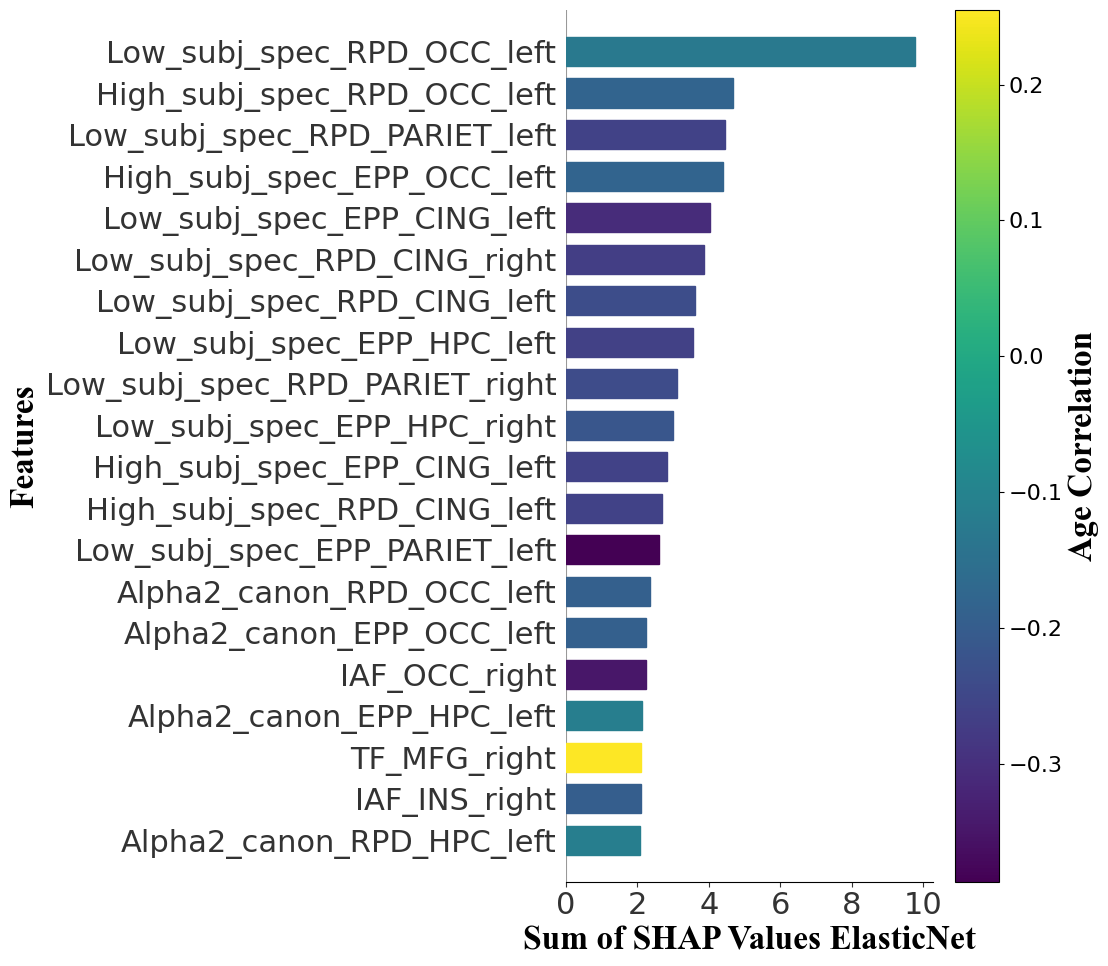

In [76]:
Plotters.plot_feature_importance(shap_values=multiple_shap_values_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

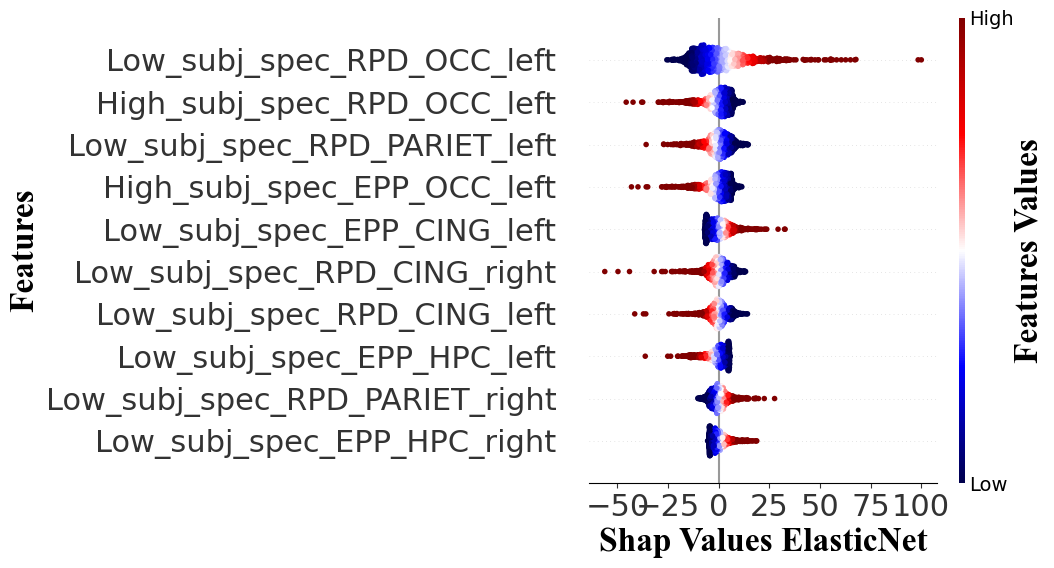

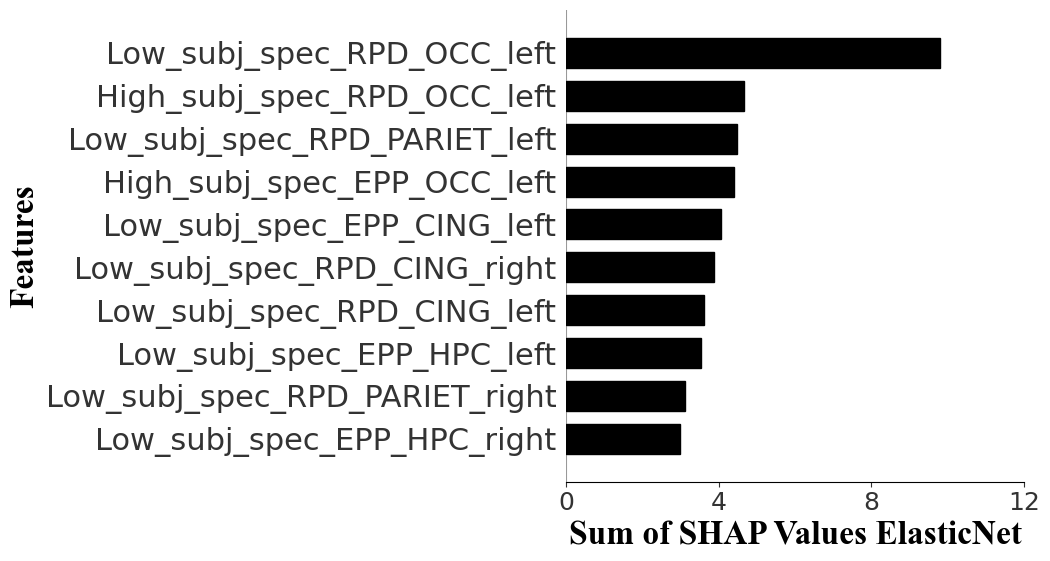

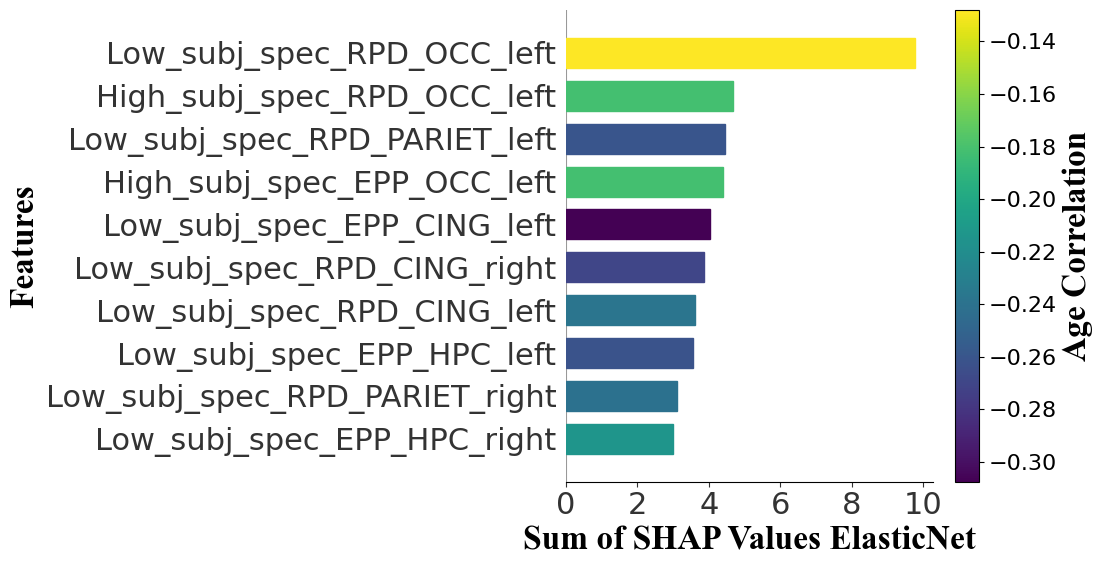

In [77]:
Plotters.plot_feature_importance(shap_values=multiple_shap_values_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation',max_features=10)

In [78]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=multiple_shap_summary_sorted_CN, num_max=20)

OCC_left: 1.000000
CING_left: 0.560693
HPC_left: 0.329744
PARIET_left: 0.300891
CING_right: 0.165163
PARIET_right: 0.132854
HPC_right: 0.127056
OCC_right: 0.094991
MFG_right: 0.090020
INS_right: 0.089207


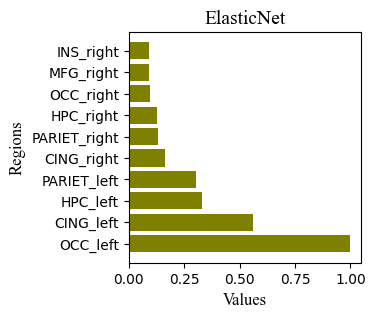

In [79]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


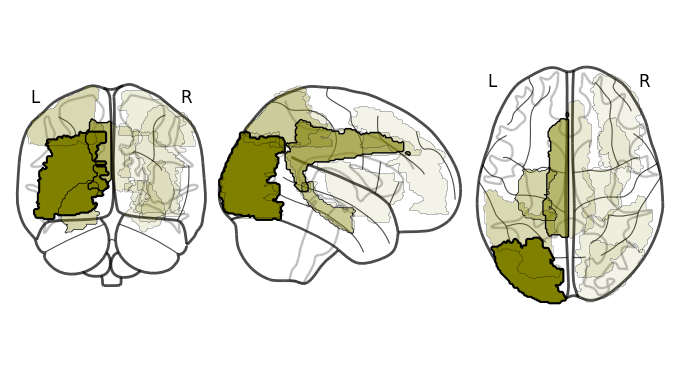

In [80]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)